In [1]:
## Loading Required libraries;

library(caret)
library(DMwR)
library(h2o)
library(ROCR)
library(ggplot2)
library(vegan)

Loading required package: lattice
Loading required package: ggplot2
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Warning message:
"package 'DMwR' was built under R version 3.6.3"Loading required package: grid
Registered S3 method overwritten by 'xts':
  method     from
  as.zoo.xts zoo 
Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 
Warning message:
"package 'h2o' was built under R version 3.6.3"
----------------------------------------------------------------------

Your next step is to start H2O:
    > h2o.init()

For H2O package documentation, ask for help:
    > ??h2o

After starting H2O, you can use the Web UI at http://localhost:54321
For more information visit https://docs.h2o.ai

----------------------------------------------------------------------


Attaching package: 'h2o'

The following objects are masked from 'package:stats':

  

In [15]:
# Loading previously prepared datasets

train_data = read.csv(file = "train_data.csv", header = T)
test_data = read.csv(file = "test_data.csv", header = T)

In [16]:
dim(train_data)

[1] 28836    43

In [17]:
head(train_data)

X,CustomerID,ReportedFraud,DateOfIncident,TypeOfIncident,TypeOfCollission,SeverityOfIncident,AuthoritiesContacted,IncidentState,IncidentCity,...,InsurancePolicyState,Policy_CombinedSingleLimit,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,InsuredRelationship,VehicleID,VehicleMake,VehicleModel,VehicleYOM
1,Cust10000,N,2015-02-03,Multi-vehicle Collision,Side Collision,Total Loss,Police,State7,City1,...,State1,100/300,1000,1632.73,0,not-in-family,Vehicle26917,Audi,A5,2008
2,Cust10001,N,2015-02-02,Multi-vehicle Collision,Side Collision,Total Loss,Police,State7,City5,...,State1,100/300,1000,1255.19,0,not-in-family,Vehicle15893,Audi,A5,2006
3,Cust10002,N,2015-01-15,Single Vehicle Collision,Side Collision,Minor Damage,Other,State8,City6,...,State3,500/1000,617,1373.38,0,wife,Vehicle5152,Volkswagen,Jetta,1999
4,Cust10003,N,2015-01-19,Single Vehicle Collision,Side Collision,Minor Damage,Other,State9,City6,...,State2,500/1000,722,1337.60,0,own-child,Vehicle37363,Volkswagen,Jetta,2003
5,Cust10004,N,2015-01-09,Single Vehicle Collision,Rear Collision,Minor Damage,Fire,State8,City6,...,State2,100/300,500,1353.73,4279863,unmarried,Vehicle28633,Toyota,CRV,2010
6,Cust10005,N,2015-02-07,Single Vehicle Collision,Rear Collision,Minor Damage,Fire,State7,City6,...,State2,100/300,500,1334.49,3921366,unmarried,Vehicle26409,Toyota,CRV,2011


In [18]:
  
  
#Corelation heatmap
cormat <- round(cor(train_data),2)
head(cormat)
library(reshape2)
melted_cormat <- melt(cormat)
head(melted_cormat)

# Get lower triangle of the correlation matrix
get_lower_tri<-function(cormat){
  cormat[upper.tri(cormat)] <- NA
  return(cormat)
}
# Get upper triangle of the correlation matrix
get_upper_tri <- function(cormat){
  cormat[lower.tri(cormat)]<- NA
  return(cormat)
}
upper_tri <- get_upper_tri(cormat)
upper_tri
# Melt the correlation matrix
melted_cormat <- melt(upper_tri, na.rm = TRUE)

#No surprising co-relations found (age and customer loyalt period naturally co-related)
melted_cormat[(melted_cormat$value> 0.2 | melted_cormat$value< -0.2) & melted_cormat$value != 1.00,]

# Heatmap
ggplot(data = melted_cormat, aes(Var2, Var1, fill = value))+
  geom_tile(color = "white")+
  scale_fill_gradient2(low = "blue", high = "red", mid = "white", 
                       midpoint = 0, limit = c(-1,1), space = "Lab", 
                       name="Pearson\nCorrelation") +
  theme_minimal()+ 
  theme(axis.text.x = element_text(angle = 45, vjust = 1, 
                                   size = 12, hjust = 1))+
  coord_fixed()


ERROR: Error in stats::cor(x, ...): 'x' must be numeric


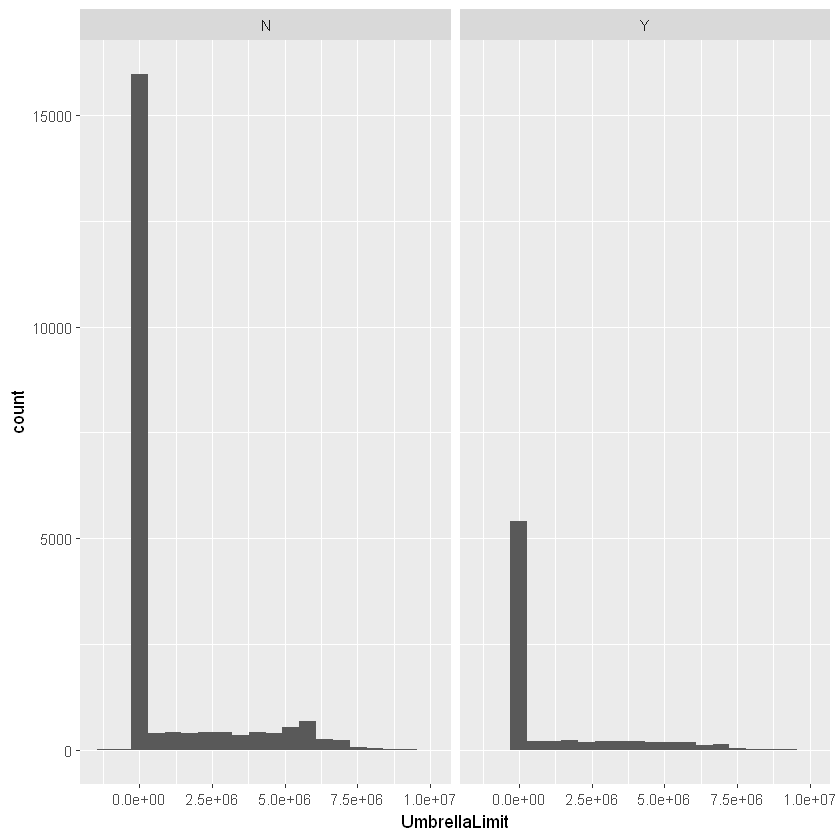

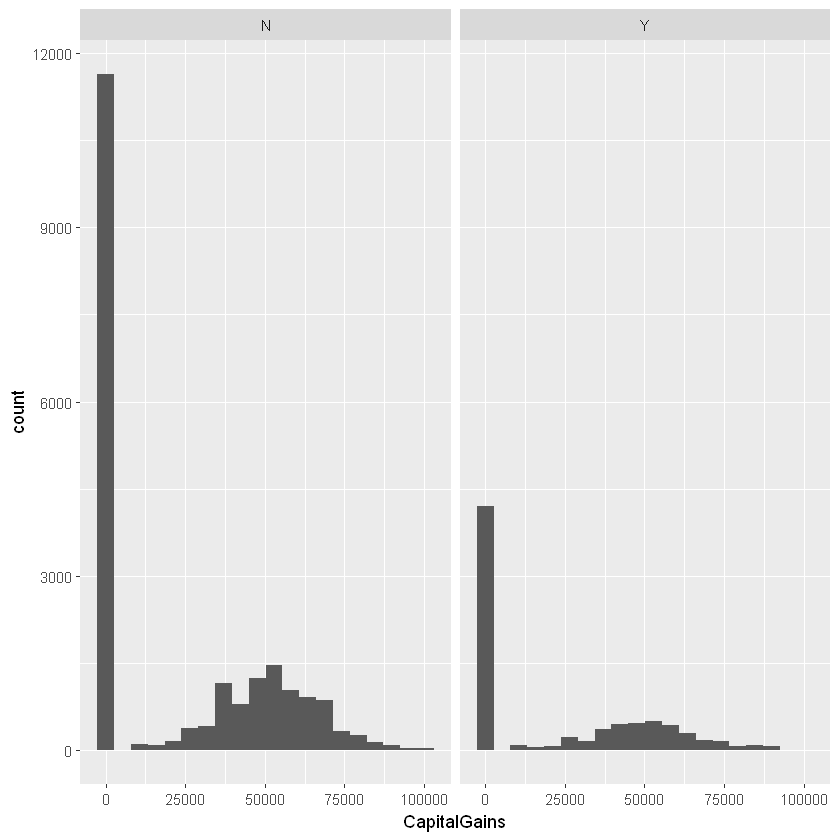

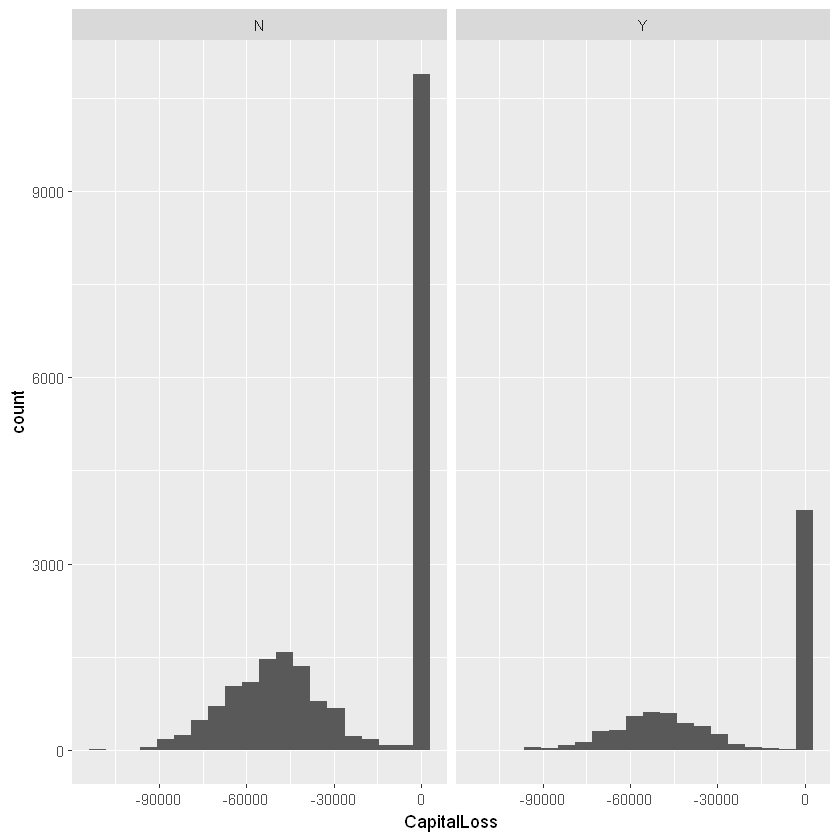

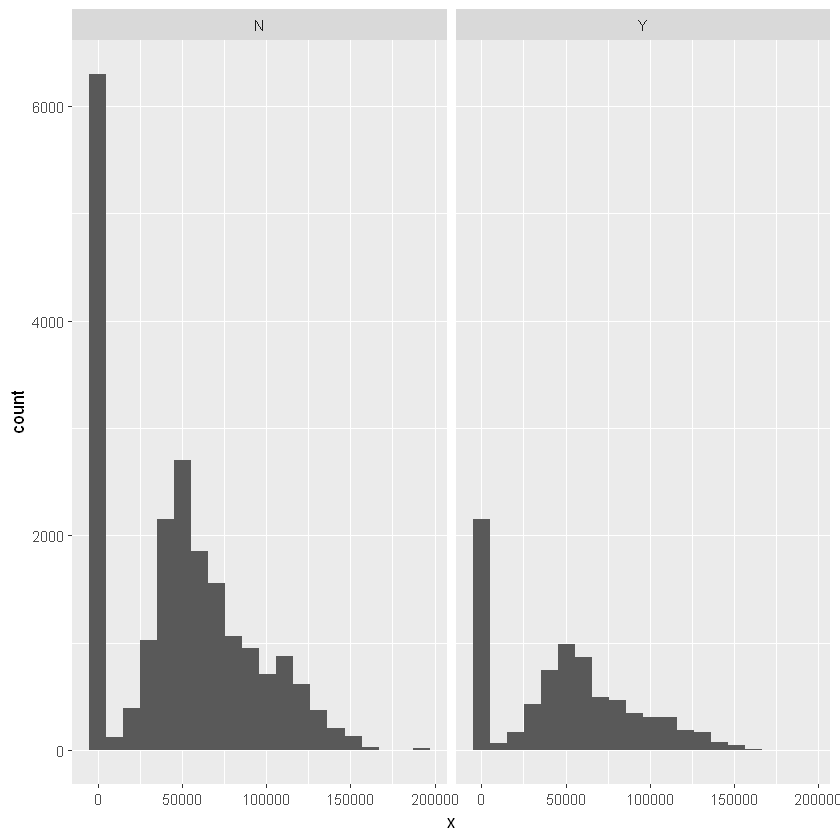

In [19]:
#Histogram



ggplot(train_data, aes(x = UmbrellaLimit)) +
  geom_histogram(bins = 20)+ geom_bar()+ facet_wrap(~ ReportedFraud)


ggplot(train_data, aes(x = CapitalGains)) +
  geom_histogram(bins = 20)+ geom_bar()+ facet_wrap(~ ReportedFraud)

ggplot(train_data, aes(x = CapitalLoss)) +
  geom_histogram(bins = 20)+ geom_bar()+ facet_wrap(~ ReportedFraud)

x <- train_data$CapitalGains - train_data$CapitalLoss
temp <- train_data
temp <- cbind(temp,x)

ggplot(temp, aes(x = x)) +
  geom_histogram(bins = 20)+ geom_bar()+ facet_wrap(~ ReportedFraud)



geom_bar: width = NULL, na.rm = FALSE
stat_count: width = NULL, na.rm = FALSE
position_stack 

geom_bar: width = NULL, na.rm = FALSE
stat_count: width = NULL, na.rm = FALSE
position_stack 

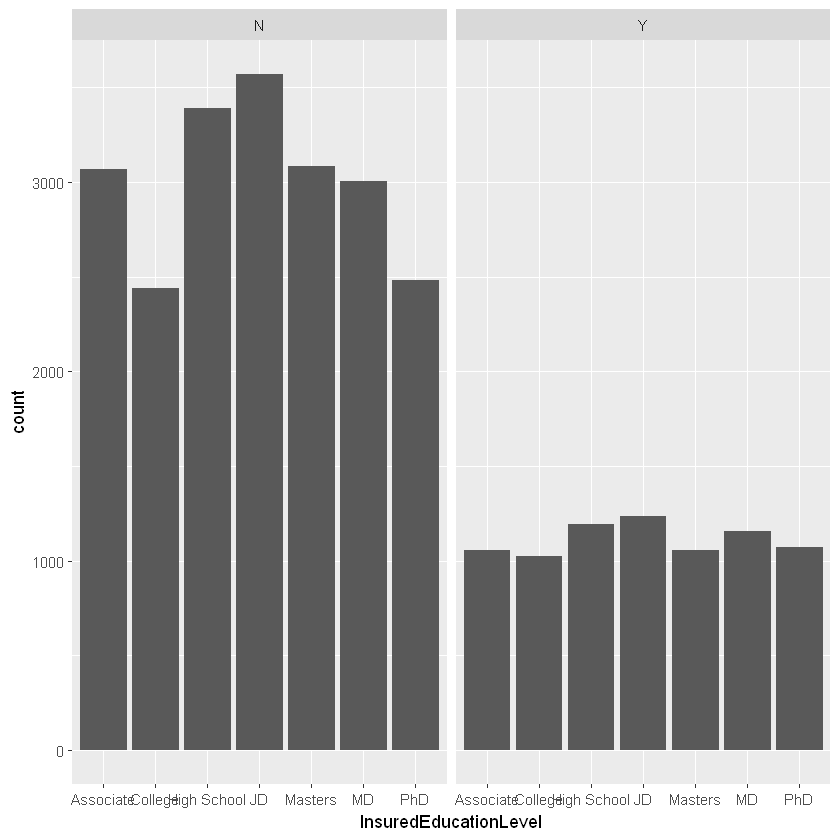

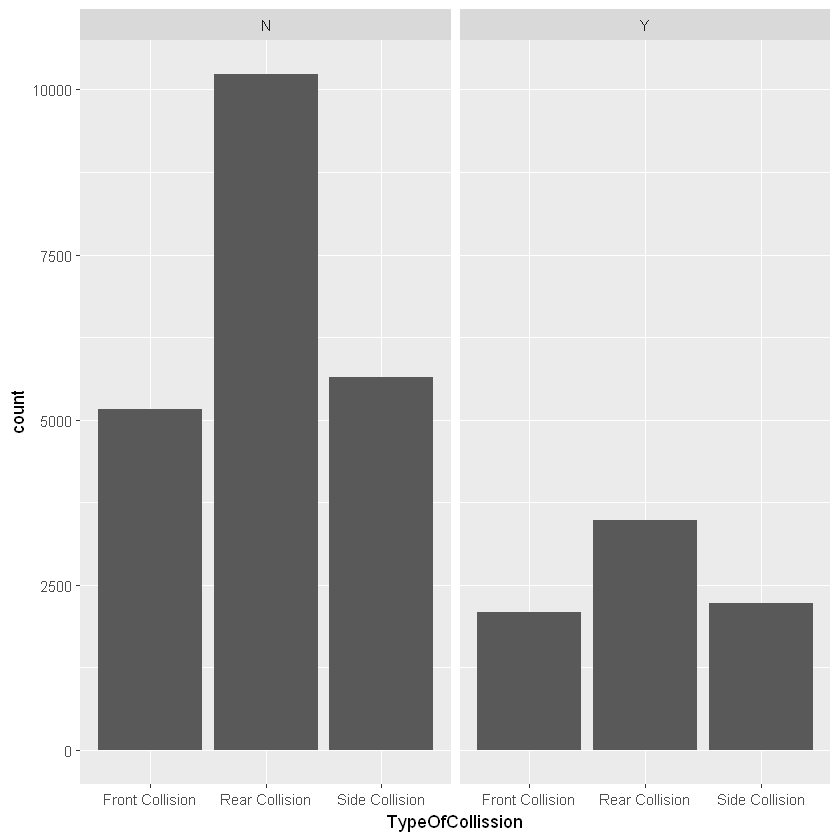

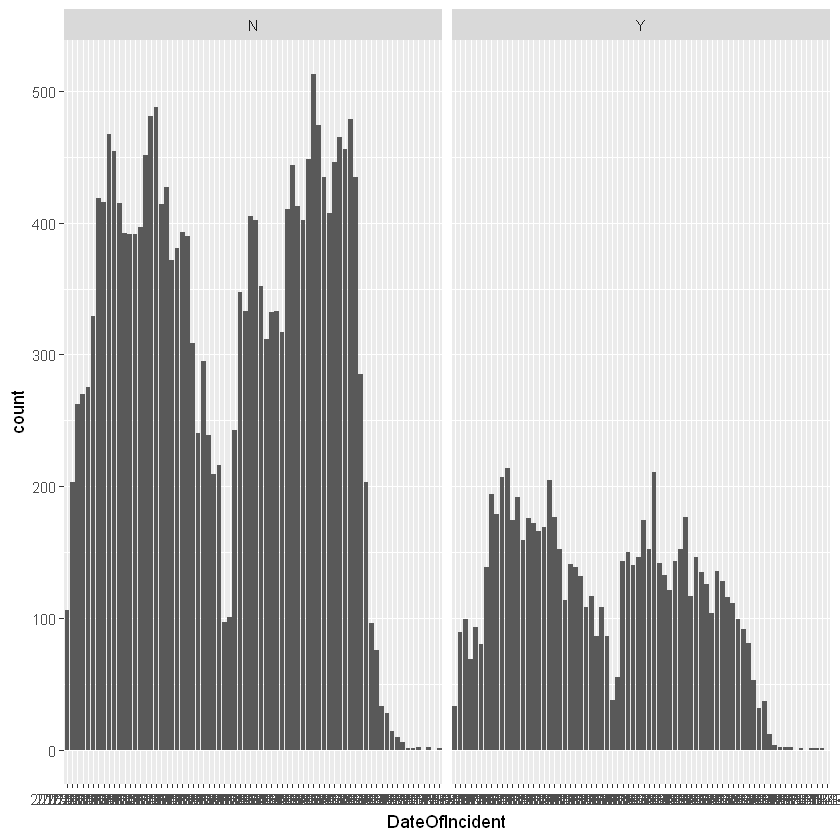

In [21]:
##Barplots 


geom_bar() 


ggplot(train_data, aes(x = InsuredEducationLevel)) +
  geom_bar()+facet_wrap( ~ ReportedFraud)
geom_bar() 

ggplot(train_data, aes(x = TypeOfCollission)) +
  geom_bar()+facet_wrap( ~ ReportedFraud)


ggplot(train_data, aes(x = DateOfIncident)) +
  geom_bar()+facet_wrap( ~ ReportedFraud)




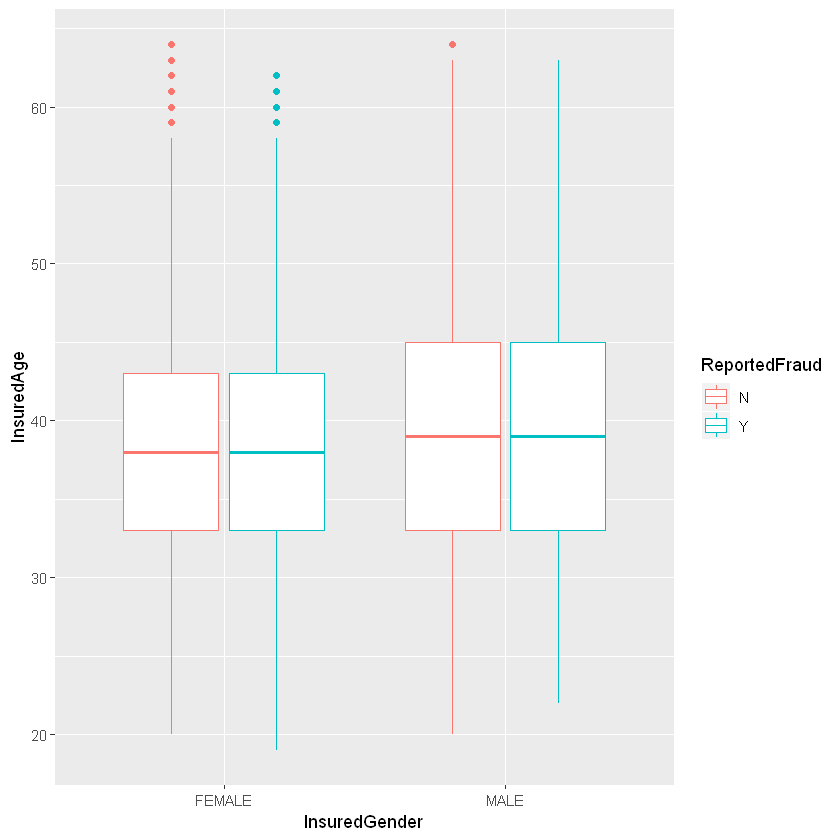

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


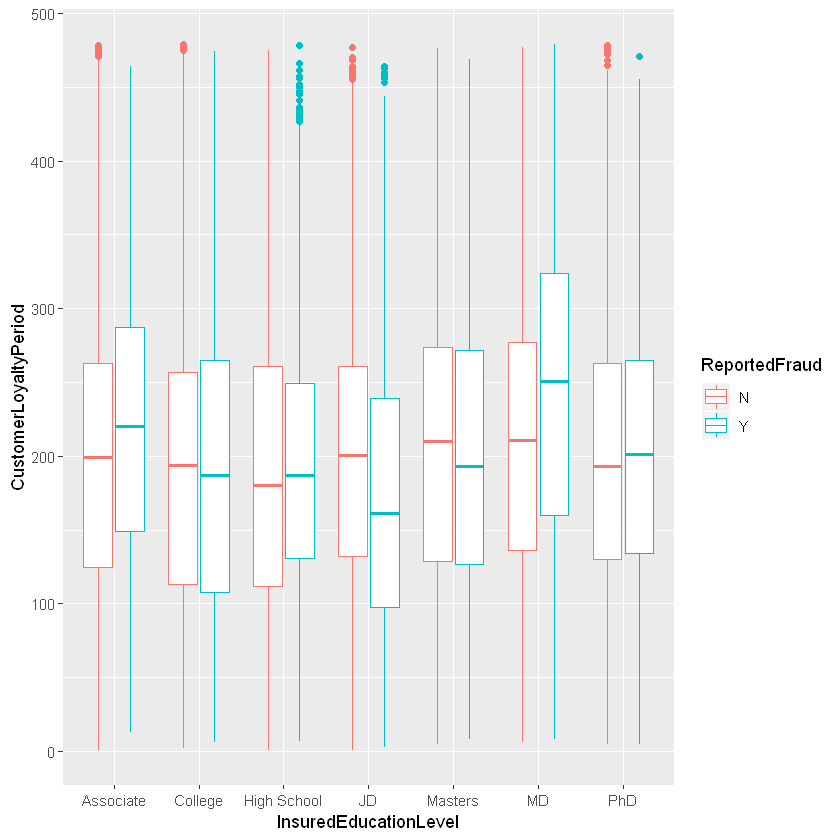

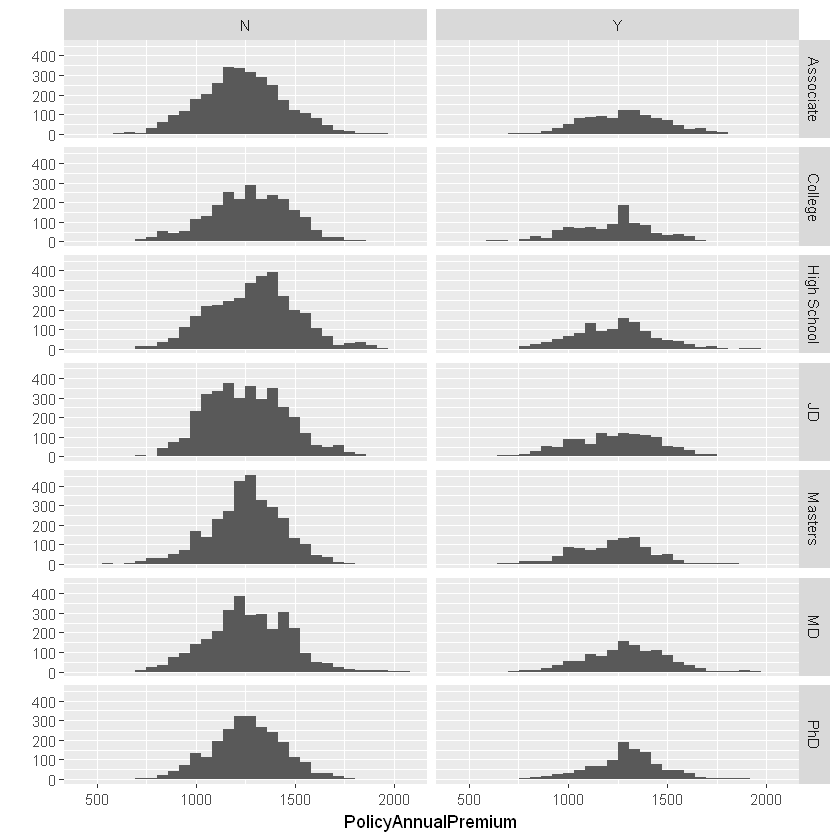

In [23]:
qplot(InsuredGender,InsuredAge, data = train_data, geom = "boxplot",col = ReportedFraud)

qplot(InsuredEducationLevel,CustomerLoyaltyPeriod, data = train_data, geom = "boxplot",col = ReportedFraud)


qplot(PolicyAnnualPremium,data = train_data, facets = InsuredEducationLevel ~ ReportedFraud)

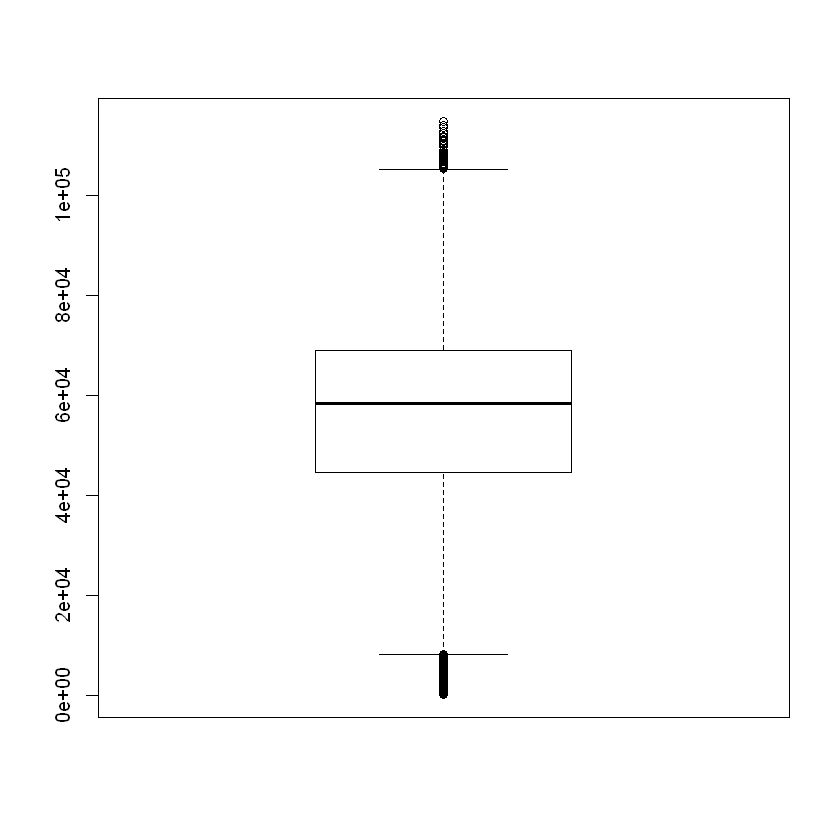

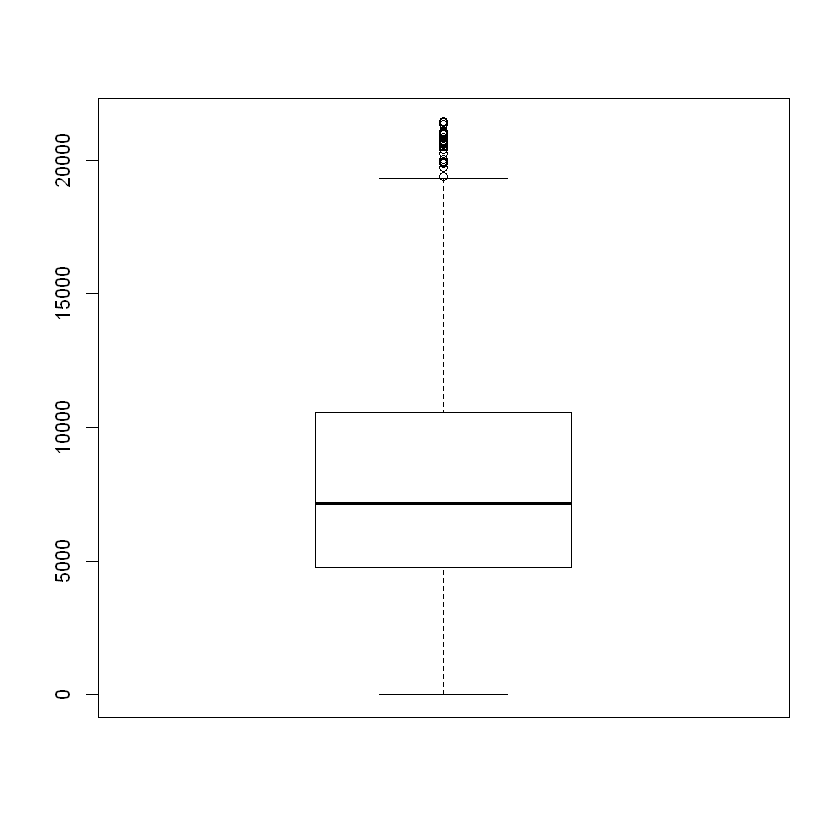

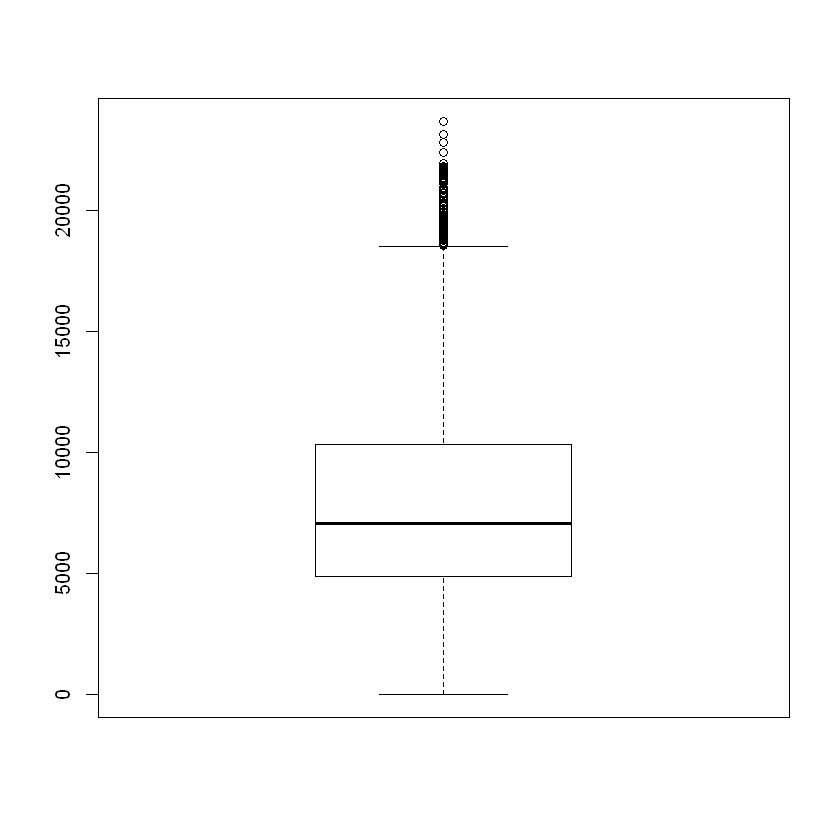

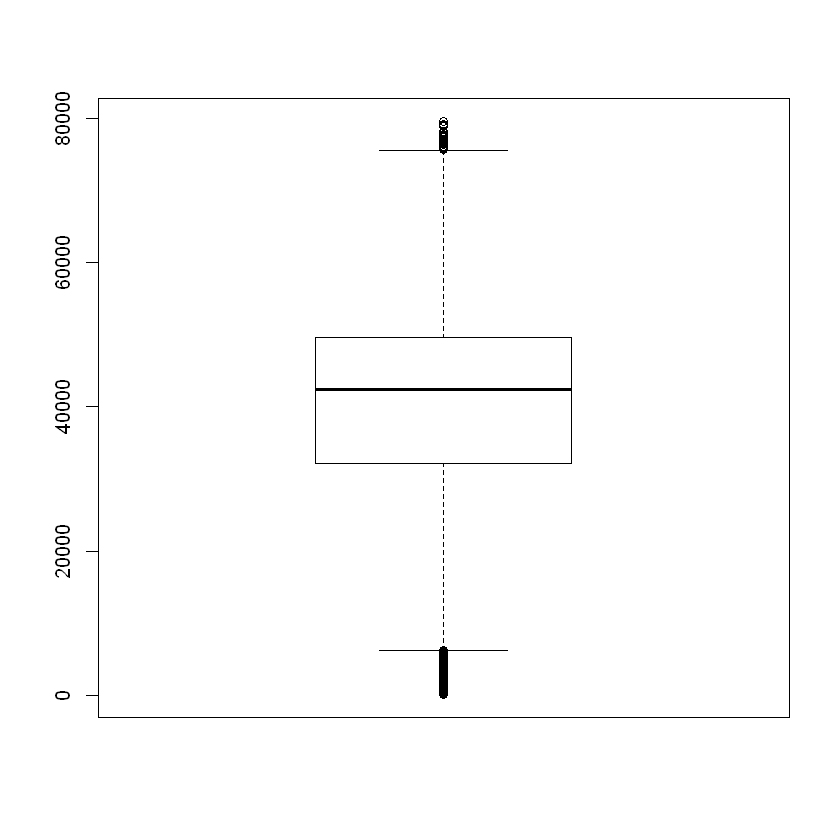

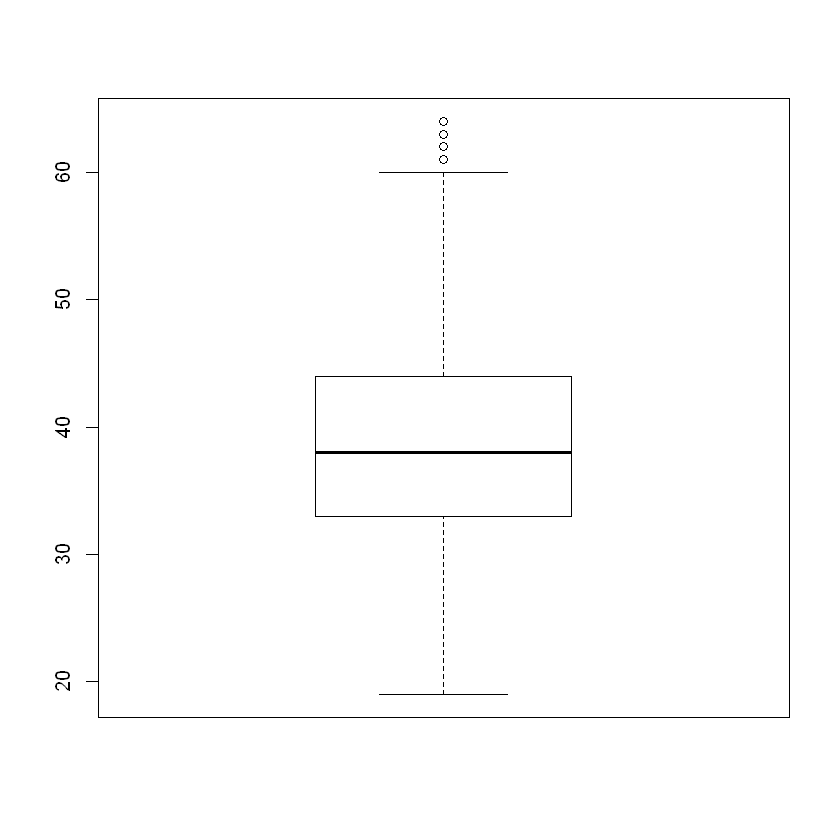

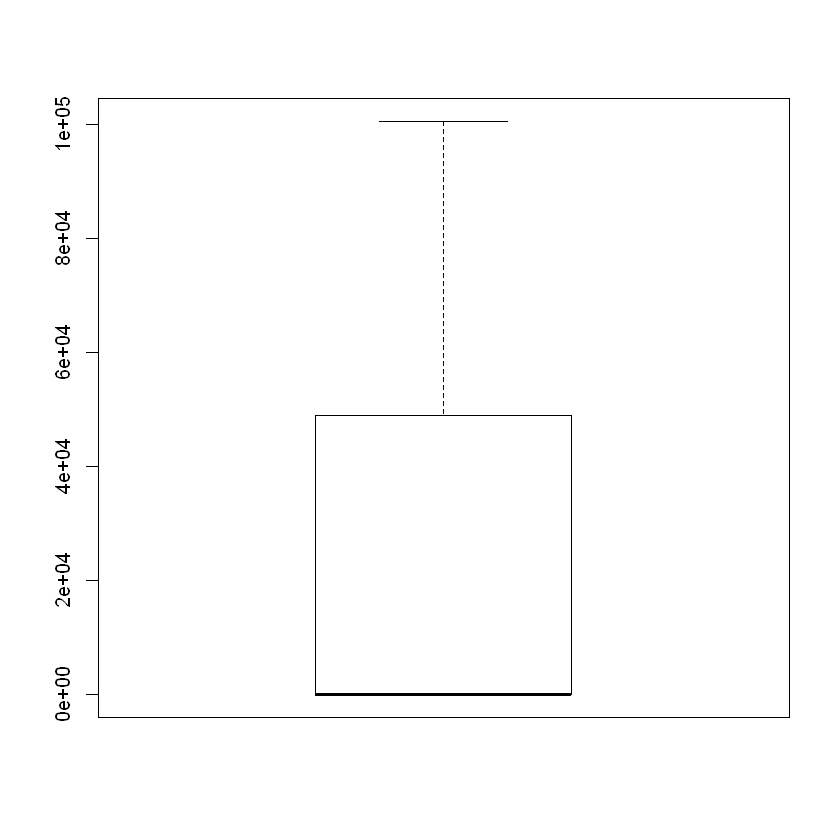

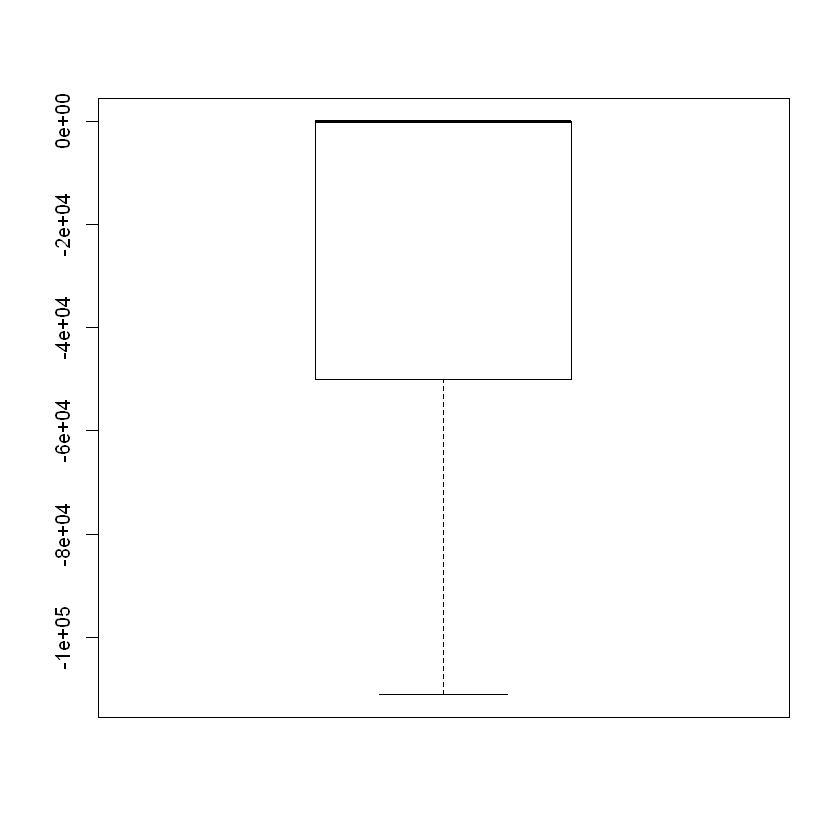

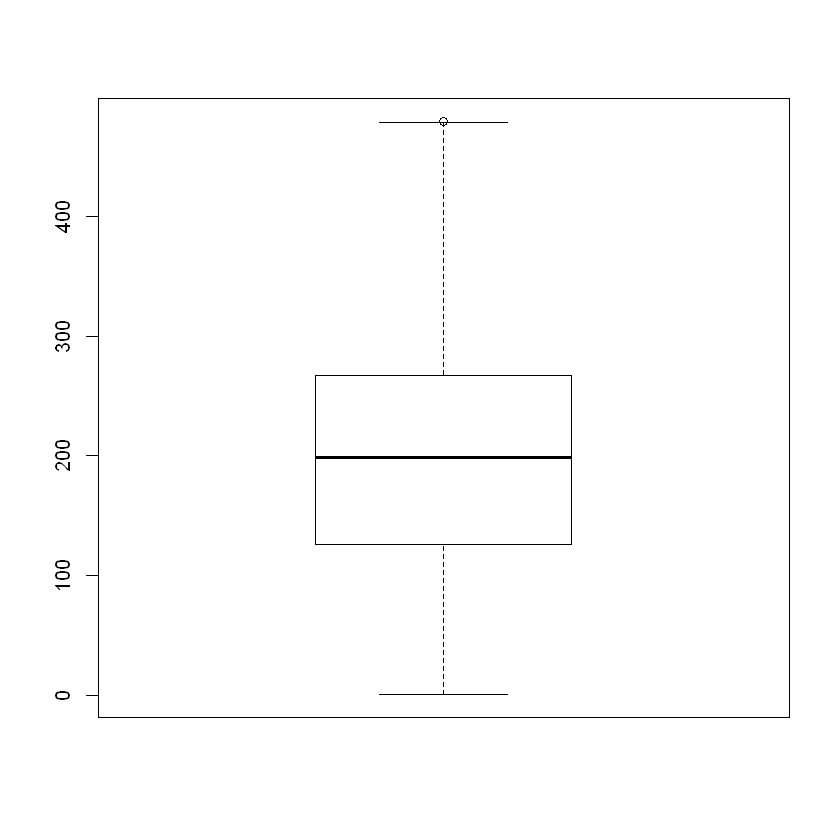

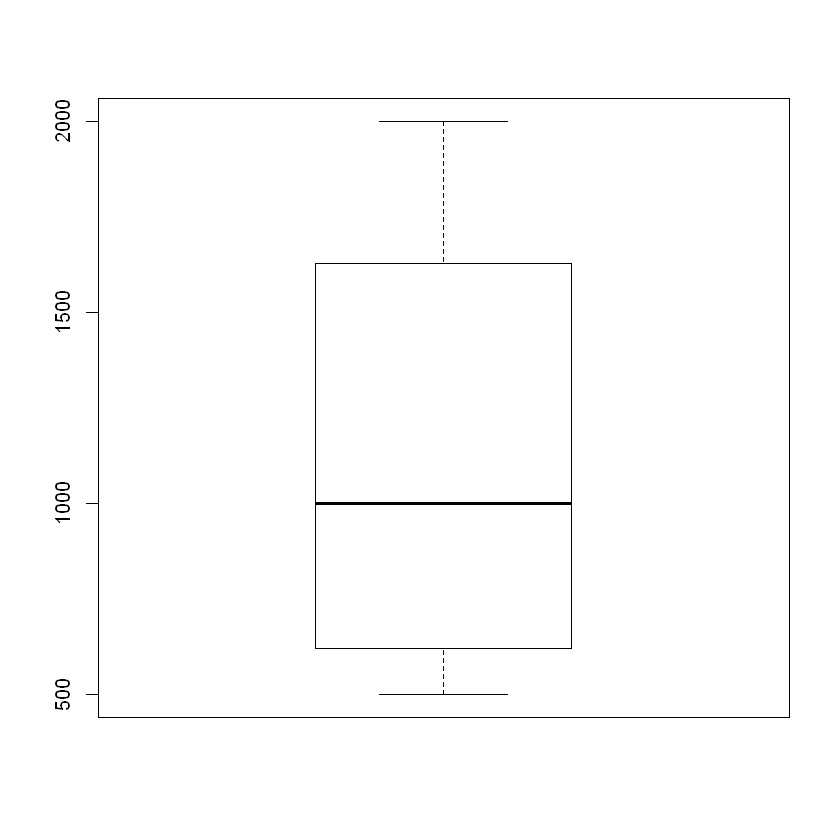

In [24]:


# Boxplots to analyze any outliers
boxplot(train_data$AmountOfTotalClaim)
boxplot(train_data$AmountOfInjuryClaim)   # Outliers beyond the 20k mark.
boxplot(train_data$AmountOfPropertyClaim)  # Outliers beyong 18k mark
boxplot(train_data$AmountOfVehicleDamage)  # Outliers above 70k and below 5k
boxplot(train_data$InsuredAge) #Outliers above 60.
boxplot(train_data$CapitalGains)
boxplot(train_data$CapitalLoss)
boxplot(train_data$CustomerLoyaltyPeriod)
boxplot(train_data$Policy_Deductible)

In [25]:

#*************************************************************************************************************************
#### Dropping unwanted variables 

train_data$Country <- NULL
train_data$CustomerID <- NULL
train_data$VehicleID <- NULL
train_data$IncidentAddress <- NULL
train_data$InsuredHobbies <- NULL
train_data$InsurancePolicyNumber <- NULL
train_data$Policy_CSL1 <- NULL # Dropping interaction term.Leaving CSL2
train_data$DateOfPolicyCoverage <- NULL
train_data$VehicleModel <- NULL # too many levels
#train_data$InsuredZipCode <- NULL
train_data$DateOfIncident <- NULL

test_data$Country <- NULL
test_data$DateOfPolicyCoverage <- NULL
test_data$DateOfIncident <- NULL
test_data$CustomerID <- NULL
test_data$VehicleID <- NULL
test_data$IncidentAddress <- NULL
test_data$InsuredHobbies <- NULL
#test_data$InsuredZipCode <- NULL
test_data$InsurancePolicyNumber <- NULL
test_data$Policy_CSL1 <- NULL
test_data$VehicleModel <- NULL # too many levels
test_data$id <- NULL
  

test_b <- test_data
train_b <- train_data
  
sum(is.na(train_data))

[1] 0

# Code for Standardizing/ Normalizing the dataset

In [26]:

### Standardization
  

library(caret)

preProc1 = preProcess(train_data[, setdiff(names(train_data),"ReportedFraud")],method=c("center", "scale"))

train_data = predict(preProc1, train_data)

summary(train_data)

str(train_data)

preProc3 = preProcess(test_data[, setdiff(names(test_data),"ReportedFraud")],method=c("center", "scale"))

test_data = predict(preProc3, test_data)

summary(test_data)

str(test_data)



### Normalization

preProc2 = preProcess(train_data[, setdiff(names(train_data),"ReportedFraud")],method = c("range"))

train_data = predict(preProc2, train_data)

summary(train_data)

str(train_data)

preProc4 = preProcess(test_data[, setdiff(names(test_data),"ReportedFraud")],method = c("range"))

test_data = predict(preProc4, test_data)

summary(test_data)

str(test_data)

       X          ReportedFraud                  TypeOfIncident 
 Min.   :-1.732   N:21051       Multi-vehicle Collision :11966  
 1st Qu.:-0.866   Y: 7785       Parked Car              : 2508  
 Median : 0.000                 Single Vehicle Collision:11677  
 Mean   : 0.000                 Vehicle Theft           : 2685  
 3rd Qu.: 0.866                                                 
 Max.   : 1.732                                                 
                                                                
        TypeOfCollission      SeverityOfIncident AuthoritiesContacted
 Front Collision: 7246   Major Damage  : 7671    Ambulance:5732      
 Rear Collision :13723   Minor Damage  :10400    Fire     :6518      
 Side Collision : 7867   Total Loss    : 8218    None     :2692      
                         Trivial Damage: 2547    Other    :5570      
                                                 Police   :8324      
                                                            

'data.frame':	28836 obs. of  34 variables:
 $ X                         : num  -1.73 -1.73 -1.73 -1.73 -1.73 ...
 $ ReportedFraud             : Factor w/ 2 levels "N","Y": 1 1 1 1 1 1 1 1 1 2 ...
 $ TypeOfIncident            : Factor w/ 4 levels "Multi-vehicle Collision",..: 1 1 3 3 3 3 3 3 1 3 ...
 $ TypeOfCollission          : Factor w/ 3 levels "Front Collision",..: 3 3 3 3 2 2 1 1 1 3 ...
 $ SeverityOfIncident        : Factor w/ 4 levels "Major Damage",..: 3 3 2 2 2 2 2 2 2 1 ...
 $ AuthoritiesContacted      : Factor w/ 5 levels "Ambulance","Fire",..: 5 5 4 4 2 2 1 5 1 5 ...
 $ IncidentState             : Factor w/ 7 levels "State3","State4",..: 5 5 6 7 6 5 3 3 7 5 ...
 $ IncidentCity              : Factor w/ 7 levels "City1","City2",..: 1 5 6 6 6 6 4 3 2 2 ...
 $ IncidentTime              : num  0.852 -0.287 1.666 1.666 -0.287 ...
 $ NumberOfVehicles          : num  1.2 1.2 -0.84 -0.84 -0.84 ...
 $ PropertyDamage            : Factor w/ 2 levels "NO","YES": 1 2 2 2 1 1 1 1 2 2 ...


       X                            TypeOfIncident        TypeOfCollission
 Min.   :-1.7318   Multi-vehicle Collision :3965   Front Collision:2380   
 1st Qu.:-0.8659   Parked Car              : 827   Rear Collision :4705   
 Median : 0.0000   Single Vehicle Collision:3914   Side Collision :2577   
 Mean   : 0.0000   Vehicle Theft           : 956                          
 3rd Qu.: 0.8659                                                          
 Max.   : 1.7318                                                          
                                                                          
      SeverityOfIncident AuthoritiesContacted IncidentState IncidentCity
 Major Damage  :2601     Ambulance:1853       State3: 198   City1:1485  
 Minor Damage  :3486     Fire     :2082       State4: 996   City2:1522  
 Total Loss    :2656     None     : 958       State5:2662   City3:1352  
 Trivial Damage: 919     Other    :1951       State6: 258   City4:1352  
                         Police   :

'data.frame':	9662 obs. of  33 variables:
 $ X                         : num  -1.73 -1.73 -1.73 -1.73 -1.73 ...
 $ TypeOfIncident            : Factor w/ 4 levels "Multi-vehicle Collision",..: 1 3 1 4 1 1 3 3 3 3 ...
 $ TypeOfCollission          : Factor w/ 3 levels "Front Collision",..: 1 2 2 2 2 3 2 3 3 3 ...
 $ SeverityOfIncident        : Factor w/ 4 levels "Major Damage",..: 2 2 2 4 2 2 1 3 3 2 ...
 $ AuthoritiesContacted      : Factor w/ 5 levels "Ambulance","Fire",..: 1 2 5 3 5 5 1 2 2 5 ...
 $ IncidentState             : Factor w/ 7 levels "State3","State4",..: 3 7 3 5 3 3 5 6 6 5 ...
 $ IncidentCity              : Factor w/ 7 levels "City1","City2",..: 2 5 2 5 2 4 1 3 3 7 ...
 $ IncidentTime              : num  -1.277 0.673 1.323 -0.302 -0.79 ...
 $ NumberOfVehicles          : num  1.214 -0.835 1.214 -0.835 1.214 ...
 $ PropertyDamage            : Factor w/ 2 levels "NO","YES": 1 1 1 1 1 1 1 1 1 2 ...
 $ BodilyInjuries            : num  -1.26734 0.00726 -1.26734 1.28185 1.28185 

       X        ReportedFraud                  TypeOfIncident 
 Min.   :0.00   N:21051       Multi-vehicle Collision :11966  
 1st Qu.:0.25   Y: 7785       Parked Car              : 2508  
 Median :0.50                 Single Vehicle Collision:11677  
 Mean   :0.50                 Vehicle Theft           : 2685  
 3rd Qu.:0.75                                                 
 Max.   :1.00                                                 
                                                              
        TypeOfCollission      SeverityOfIncident AuthoritiesContacted
 Front Collision: 7246   Major Damage  : 7671    Ambulance:5732      
 Rear Collision :13723   Minor Damage  :10400    Fire     :6518      
 Side Collision : 7867   Total Loss    : 8218    None     :2692      
                         Trivial Damage: 2547    Other    :5570      
                                                 Police   :8324      
                                                                     
      

'data.frame':	28836 obs. of  34 variables:
 $ X                         : num  0.00 3.47e-05 6.94e-05 1.04e-04 1.39e-04 ...
 $ ReportedFraud             : Factor w/ 2 levels "N","Y": 1 1 1 1 1 1 1 1 1 2 ...
 $ TypeOfIncident            : Factor w/ 4 levels "Multi-vehicle Collision",..: 1 1 3 3 3 3 3 3 1 3 ...
 $ TypeOfCollission          : Factor w/ 3 levels "Front Collision",..: 3 3 3 3 2 2 1 1 1 3 ...
 $ SeverityOfIncident        : Factor w/ 4 levels "Major Damage",..: 3 3 2 2 2 2 2 2 2 1 ...
 $ AuthoritiesContacted      : Factor w/ 5 levels "Ambulance","Fire",..: 5 5 4 4 2 2 1 5 1 5 ...
 $ IncidentState             : Factor w/ 7 levels "State3","State4",..: 5 5 6 7 6 5 3 3 7 5 ...
 $ IncidentCity              : Factor w/ 7 levels "City1","City2",..: 1 5 6 6 6 6 4 3 2 2 ...
 $ IncidentTime              : num  0.739 0.435 0.957 0.957 0.435 ...
 $ NumberOfVehicles          : num  0.667 0.667 0 0 0 ...
 $ PropertyDamage            : Factor w/ 2 levels "NO","YES": 1 2 2 2 1 1 1 1 2 2 ...

       X                         TypeOfIncident        TypeOfCollission
 Min.   :0.00   Multi-vehicle Collision :3965   Front Collision:2380   
 1st Qu.:0.25   Parked Car              : 827   Rear Collision :4705   
 Median :0.50   Single Vehicle Collision:3914   Side Collision :2577   
 Mean   :0.50   Vehicle Theft           : 956                          
 3rd Qu.:0.75                                                          
 Max.   :1.00                                                          
                                                                       
      SeverityOfIncident AuthoritiesContacted IncidentState IncidentCity
 Major Damage  :2601     Ambulance:1853       State3: 198   City1:1485  
 Minor Damage  :3486     Fire     :2082       State4: 996   City2:1522  
 Total Loss    :2656     None     : 958       State5:2662   City3:1352  
 Trivial Damage: 919     Other    :1951       State6: 258   City4:1352  
                         Police   :2818       State7:2371  

'data.frame':	9662 obs. of  33 variables:
 $ X                         : num  0 0.000104 0.000207 0.000311 0.000414 ...
 $ TypeOfIncident            : Factor w/ 4 levels "Multi-vehicle Collision",..: 1 3 1 4 1 1 3 3 3 3 ...
 $ TypeOfCollission          : Factor w/ 3 levels "Front Collision",..: 1 2 2 2 2 3 2 3 3 3 ...
 $ SeverityOfIncident        : Factor w/ 4 levels "Major Damage",..: 2 2 2 4 2 2 1 3 3 2 ...
 $ AuthoritiesContacted      : Factor w/ 5 levels "Ambulance","Fire",..: 1 2 5 3 5 5 1 2 2 5 ...
 $ IncidentState             : Factor w/ 7 levels "State3","State4",..: 3 7 3 5 3 3 5 6 6 5 ...
 $ IncidentCity              : Factor w/ 7 levels "City1","City2",..: 2 5 2 5 2 4 1 3 3 7 ...
 $ IncidentTime              : num  0.174 0.696 0.87 0.435 0.304 ...
 $ NumberOfVehicles          : num  0.667 0 0.667 0 0.667 ...
 $ PropertyDamage            : Factor w/ 2 levels "NO","YES": 1 1 1 1 1 1 1 1 1 2 ...
 $ BodilyInjuries            : num  0 0.5 0 1 1 0.5 0 0 0.5 0.5 ...
 $ Witnesses   